In [1]:
# Importing all require Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

In [3]:
# importing dataset

In [4]:
df=pd.read_csv('D:\\python\\bitcoin_price_Training - Training.csv',parse_dates=True,index_col='Date')

In [5]:
# taking date coln as index and converting into to_datetime

In [6]:
df.index=pd.to_datetime(df.index)

In [7]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [8]:
# there are 4 float features and 2 object faeture

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1556 entries, 2017-07-31 to 2013-04-28
Data columns (total 6 columns):
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


In [10]:
# stastical description of data

In [11]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [12]:
# sorting index as 2017 coming first and 2013 year coming last

In [13]:
df=df.sort_index()

In [14]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


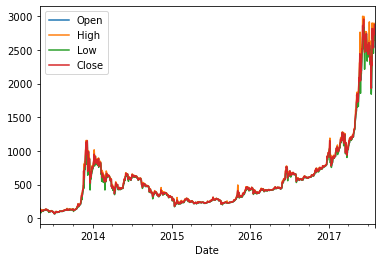

In [15]:
df.plot()

Text(0, 0.5, 'Daily bitcoin price')

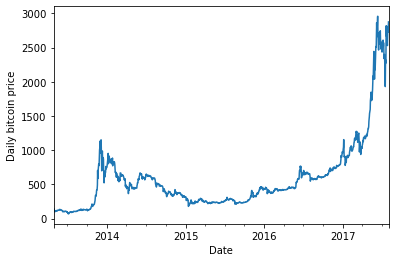

In [16]:
df['Close'].plot()
plt.ylabel('Daily bitcoin price')

In [17]:
# In this model i am going to forecast the Closing price 
# So, we eliminate all other

In [18]:
df = df['Close']

In [19]:
# taking closing weekly

In [20]:
weekly=df.resample('W').sum()

In [21]:
weekly.head()

Date
2013-04-28    134.21
2013-05-05    831.90
2013-05-12    797.48
2013-05-19    830.97
2013-05-26    894.13
Freq: W-SUN, Name: Close, dtype: float64

Text(0, 0.5, 'Weekly bitcoin price')

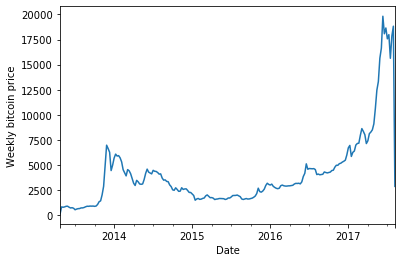

In [22]:
weekly.plot()
plt.ylabel('Weekly bitcoin price')

In [23]:
# plotting data yearly

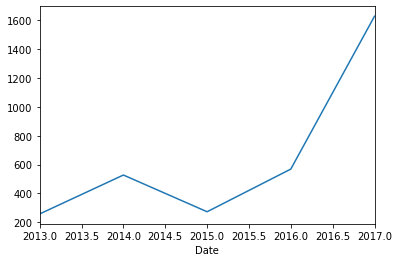

In [24]:
by_year = df.groupby(df.index.year).mean()
by_year.plot()

In [25]:
# taking sum of weekdays

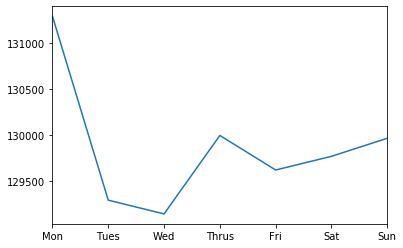

In [26]:
by_weekdays=df.groupby(df.index.dayofweek).sum()
by_weekdays.index=['Mon','Tues','Wed','Thrus','Fri','Sat','Sun']
by_weekdays.plot()

In [27]:
# plotting by day of year

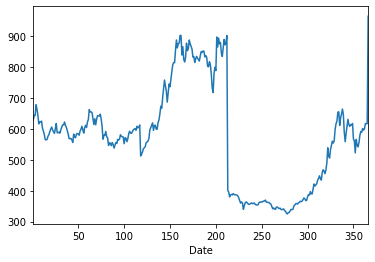

In [28]:
by_day_year=df.groupby(df.index.dayofyear).mean()
by_day_year.plot()

In [29]:
# plotting by month

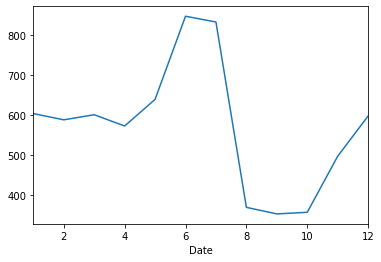

In [30]:
by_month=df.groupby(df.index.month).mean()
by_month.plot()

In [31]:
# plotting by quarter

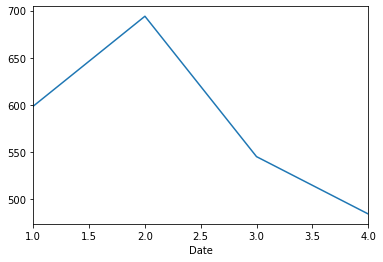

In [32]:
by_quater=df.groupby(df.index.quarter).mean()
by_quater.plot()

In [33]:
ts = df

In [34]:
# as we can see here it follows some trend

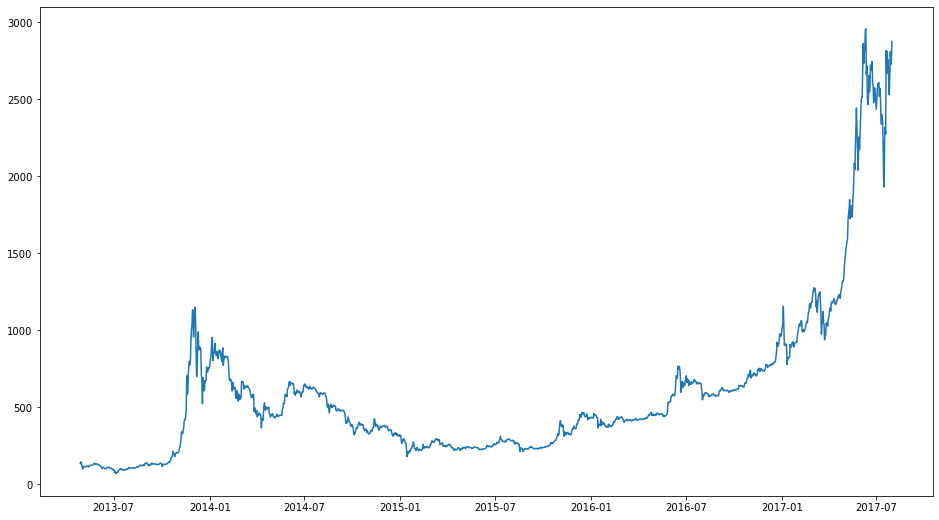

In [35]:
plt.figure(figsize=(16,9))
plt.plot(ts)

In [36]:
from statsmodels.tsa.stattools import adfuller
def stationary_test(timeseries):
    #     determine rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()
    
#     plotting rolling statistics    
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(rolmean,color='red',label='Roling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Std Deviation')
    plt.show()
    
     #Perform Dickey-Fuller test:
    print('Result for dickey-fuller test')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



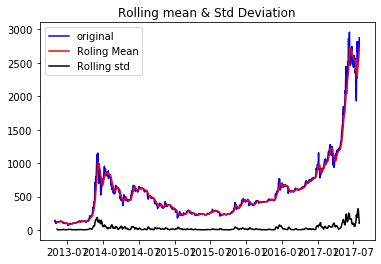

Result for dickey-fuller test
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [37]:
stationary_test(ts)

In [38]:
# the above stats show that rolling mean value varies with time and is not stationary.
# so to make it stationary we need to normalize the data

In [39]:
# transfoeming to eliminate the trend

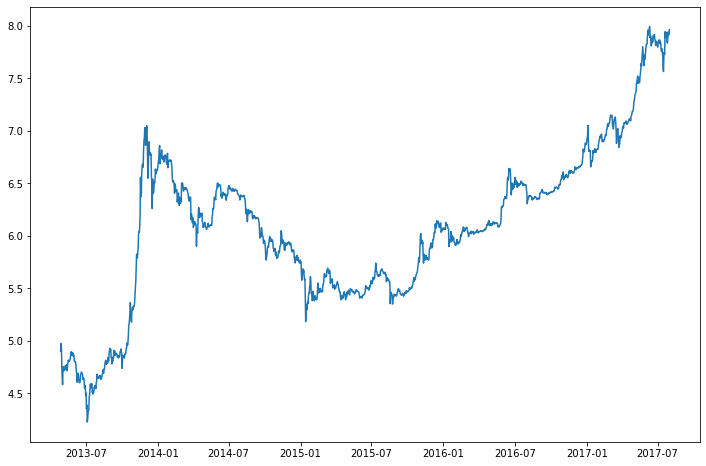

In [40]:
ts_transformed = np.log(ts)
plt.figure(figsize=(12,8))
plt.plot(ts_transformed)

In [41]:
# applying rolling for smoothing the data

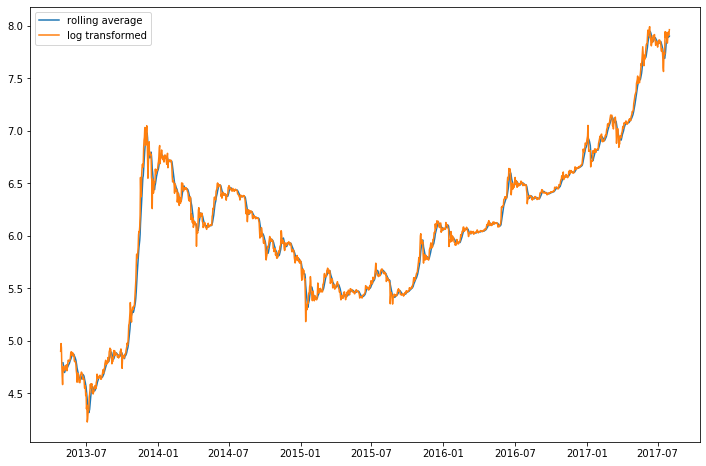

In [42]:
rolling_average=ts_transformed.rolling(window=7,center=False).mean()
plt.figure(figsize=(12,8))
plt.plot(rolling_average,label='rolling average')
plt.plot(ts_transformed,label='log transformed')
plt.legend()



In [43]:
# in this we have rolling average of past 7 values


In [44]:
rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [45]:
log_rolling_differnce = ts_transformed-rolling_average
print(log_rolling_differnce.head())
print(log_rolling_differnce.tail())

Date
2013-04-28   NaN
2013-04-29   NaN
2013-04-30   NaN
2013-05-01   NaN
2013-05-02   NaN
Name: Close, dtype: float64
Date
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64


In [46]:
# replace nan with 0

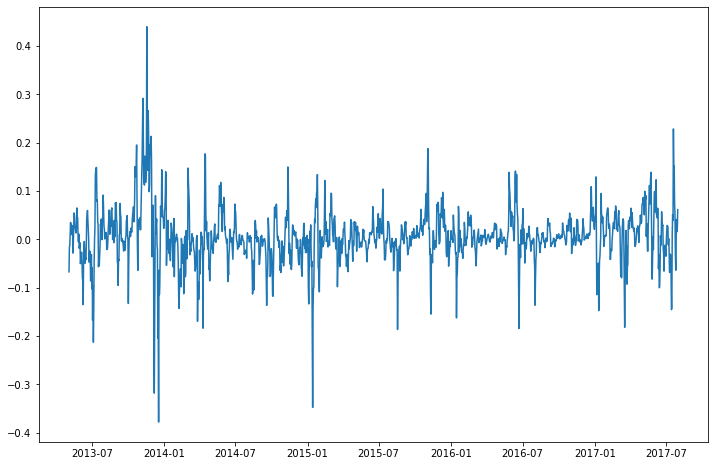

In [47]:
log_rolling_differnce.dropna(inplace=True)
plt.figure(figsize=(12,8))
plt.plot(log_rolling_differnce)

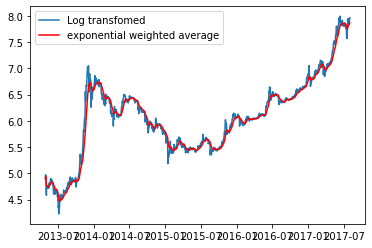

In [50]:
expwighted_avg = ts_transformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_transformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

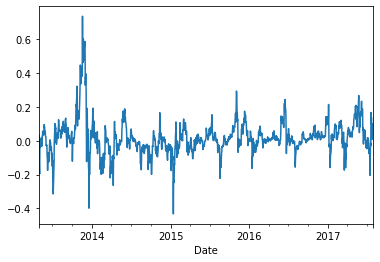

In [52]:
log_expmovwt_diff = ts_transformed - expwighted_avg
log_expmovwt_diff.plot()

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

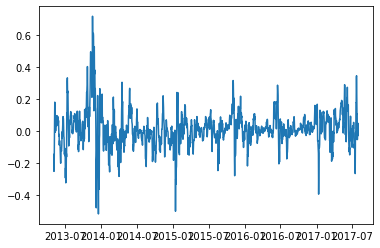

In [53]:
ts_diff_logtrans = ts_transformed -ts_transformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

In [54]:
ts_diff_logtrans.dropna(inplace=True)
# test_for_stationary(ts_diff_logtrans)

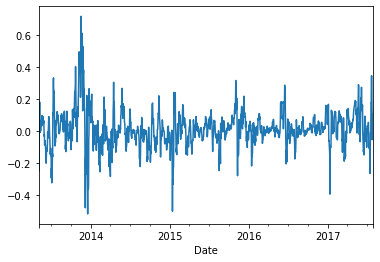

In [55]:
ts_diff_logtrans.plot()

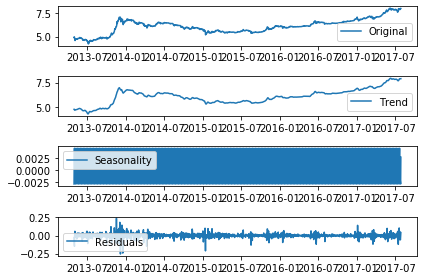

In [59]:
decomposition = seasonal_decompose(ts_transformed)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_transformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

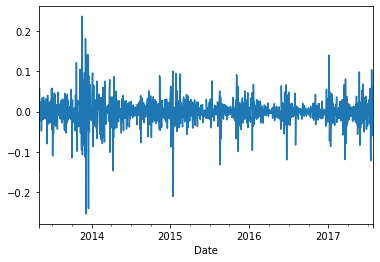

In [61]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
decomposed_TS.plot()

In [62]:
# forecasting

In [63]:
lag_acf = acf(ts_transformed, nlags=30)
lag_pacf = pacf(ts_transformed, nlags=50, method='ols')

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

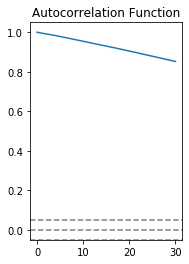

In [72]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

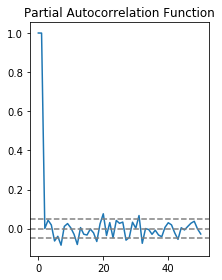

In [65]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_transformed)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_transformed)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

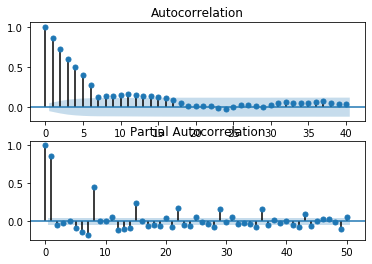

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [69]:
from statsmodels.tsa.arima_model import ARIMA

In [70]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


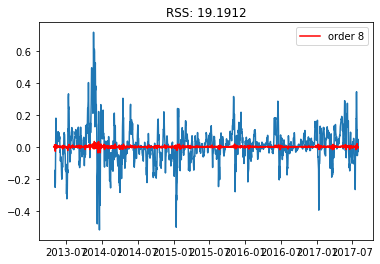

In [73]:
model = ARIMA(ts_transformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


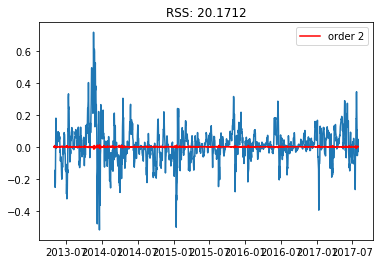

In [74]:
model = ARIMA(ts_transformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [75]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 20 Feb 2020   AIC                          -5401.380
Time:                        09:01:23   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.057   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 19.0817')

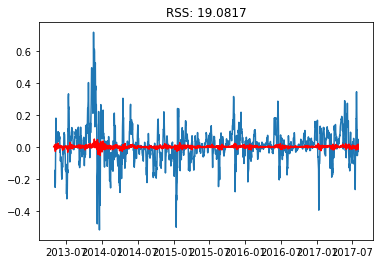

In [76]:
model = ARIMA(ts_transformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [77]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 20 Feb 2020   AIC                          -5414.646
Time:                        09:04:41   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

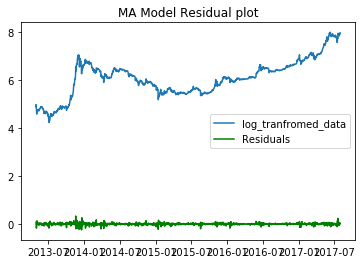

In [78]:
plt.plot(ts_transformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


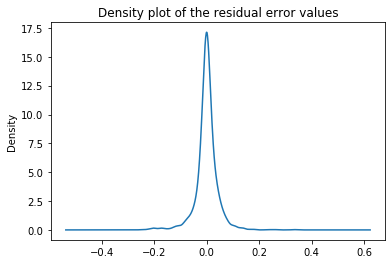

In [79]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


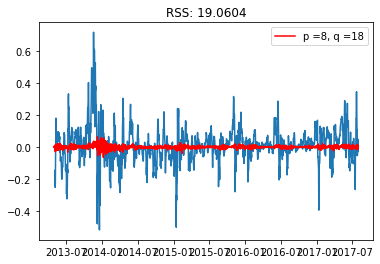

In [80]:
model = ARIMA(ts_transformed, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [81]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(8, 1, 18)   Log Likelihood                2744.939
Method:                       css-mle   S.D. of innovations              0.041
Date:                Thu, 20 Feb 2020   AIC                          -5435.878
Time:                        09:45:04   BIC                          -5291.449
Sample:                    04-29-2013   HQIC                         -5382.170
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close     -1.2597      0.318     -3.964      0.000      -1.883      -0.637
ar.L2.D.Close     -0.7753      0.507     -1.528      0.127      -1.769       0.219
ar.L3.D.Close     -0.7146      0.417

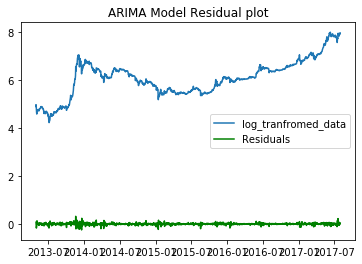

In [82]:
plt.plot(ts_transformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.001500
std         0.041420
min        -0.246336
25%        -0.012670
50%         0.001621
75%         0.018297
max         0.320604
dtype: float64


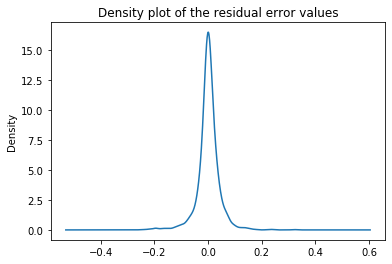

In [83]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [84]:
test = pd.read_csv("D:\\python\\bitcoin_price_1week_Test - Test.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

In [85]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30   -0.000021
2013-05-01   -0.002728
2013-05-02    0.000189
2013-05-03    0.011427
dtype: float64


In [86]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30   -0.000021
2013-05-01   -0.002749
2013-05-02   -0.002560
2013-05-03    0.008867
dtype: float64


In [87]:
predictions_ARIMA_log = pd.Series(ts_transformed.iloc[0], index=ts_transformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899385
2013-05-01    4.896657
2013-05-02    4.896846
dtype: float64

Text(0.5, 1.0, 'RMSE: 636.1260')

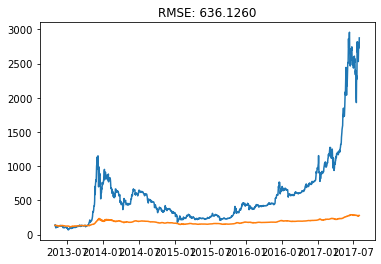

In [91]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

In [92]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2878.427458
2017-08-02    2933.838440
2017-08-03    3007.149550
2017-08-04    3025.492441
2017-08-05    2979.595915
2017-08-06    3019.346987
2017-08-07    2951.500224
dtype: float64
Test MSE: 61214.290


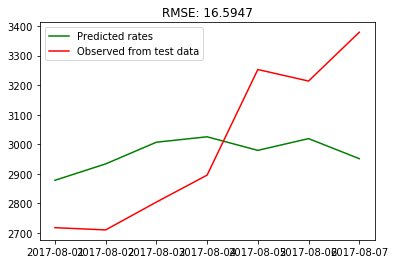

In [94]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(df)))
plt.legend(loc = 'best')

In [95]:
# Using MA model to predict and forecast

In [96]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2013-04-29    0.001941
2013-04-30    0.001458
2013-05-01    0.000081
2013-05-02    0.002704
2013-05-03    0.013811
dtype: float64


In [97]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2013-04-29    0.001941
2013-04-30    0.003399
2013-05-01    0.003480
2013-05-02    0.006184
2013-05-03    0.019995
dtype: float64


In [99]:
predictions_MA_log = pd.Series(ts_transformed.iloc[0], index=ts_transformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901347
2013-04-30    4.902805
2013-05-01    4.902885
2013-05-02    4.905590
dtype: float64

Text(0.5, 1.0, 'RMSE: 362.5188')

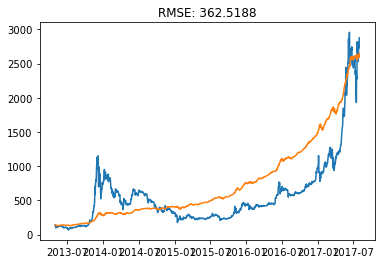

In [101]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(df)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-df)**2)/len(df)))

In [102]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2873.760785
2017-08-02    2933.263268
2017-08-03    2985.844108
2017-08-04    3001.085328
2017-08-05    2982.756205
2017-08-06    3057.338044
2017-08-07    3063.277883
dtype: float64
Test MSE: 44963.779


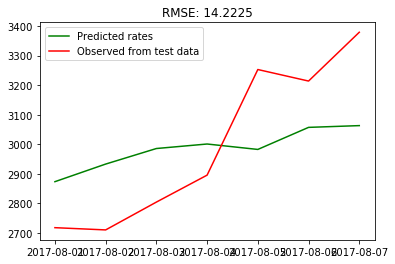

In [104]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(df)))
plt.legend(loc = 'best')

Date
2013-04-30    139.250000
2013-05-31    119.993226
2013-06-30    107.761333
2013-07-31     90.512258
2013-08-31    113.905161
2013-09-30    130.061667
2013-10-31    158.311935
2013-11-30    550.420667
2013-12-31    800.780968
2014-01-31    844.168387
2014-02-28    661.618214
2014-03-31    592.200323
2014-04-30    461.362000
Freq: M, Name: Close, dtype: float64


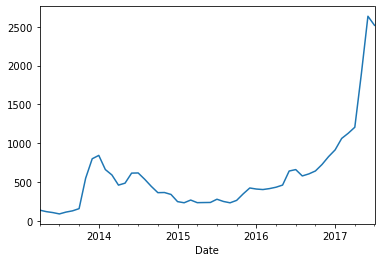

In [105]:
monthly_mean = df.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()

In [106]:
test_logtransformed = np.log(test)

In [108]:
history = [x for x in ts_transformed]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)

predicted=7.963377, expected=7.907747
predicted=7.963377, expected=7.904951
predicted=7.963377, expected=7.939063
predicted=7.963377, expected=7.971048
predicted=7.963377, expected=8.087305
predicted=7.963377, expected=8.075253
predicted=7.963377, expected=8.125317
Test MSE: 0.009
